In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_train=pd.read_csv('mnsit_train/train.csv')
print(data_train)
x=data_train.drop(columns=['label'])
y=data_train['label']
print(x.shape)
print(y.shape)


test_data=pd.read_csv('mnsit_train/test.csv')


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [3]:
# preprossing of data


# handling missing values
x.fillna(0)
test_data.fillna(0)

# normalization
x=x/255
test_data=test_data/255

# reshaping 
x=x.values.reshape(-1,28,28,1)
test_data=test_data.values.reshape(-1,28,28,1)

# one hot encoding
y=tf.keras.utils.to_categorical(y, num_classes=10)

In [4]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [5]:
#data augumentaion


In [6]:
# building a the cnn
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

c:\Users\vedan\ml\ml\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [8]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images0


datagen.fit(x)

In [ ]:
#trianing the model
history = model.fit(x,y,epochs=1,validation_split=0.2,verbose=1)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9784 - loss: 0.0718 - val_accuracy: 0.9843 - val_loss: 0.0482


: 

In [ ]:
# augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x)

In [ ]:
#trianing the model
history = model.fit(x,y,epochs=2,validation_split=0.1,verbose=1)

Epoch 1/2
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.9921 - loss: 0.0235 - val_accuracy: 0.9893 - val_loss: 0.0391
Epoch 2/2
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.9952 - loss: 0.0170 - val_accuracy: 0.9910 - val_loss: 0.0317


In [ ]:
# augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x)

In [ ]:
#trianing the model
history = model.fit(x,y,epochs=2,validation_split=0.1,verbose=1)

Epoch 1/2
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - accuracy: 0.9943 - loss: 0.0185 - val_accuracy: 0.9931 - val_loss: 0.0268
Epoch 2/2
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.9948 - loss: 0.0146 - val_accuracy: 0.9929 - val_loss: 0.0294


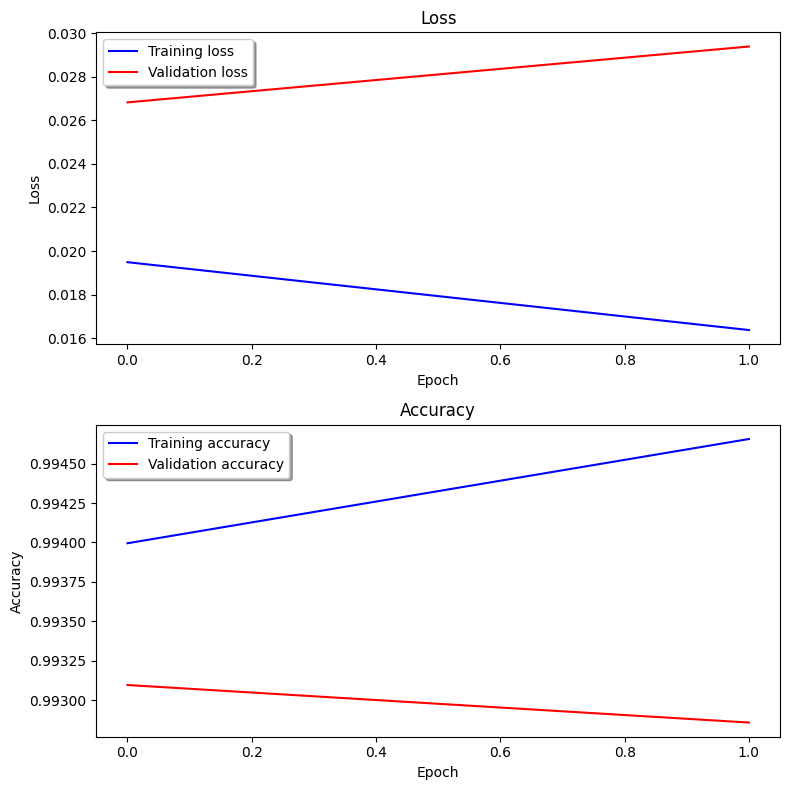

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Loss plot
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

# Accuracy plot
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# Predict the classes for the test_data
pred_probs = model.predict(test_data)
pred = np.argmax(pred_probs, axis=1)

# Store predictions in a DataFrame
pred_df = pd.DataFrame({'ImageId': np.arange(1, len(pred) + 1), 'Label': pred})
print(pred_df.head())

pred_df.to_csv("submission.csv",index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3
